<b> Importing Libraries

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
import os
import imageio

<b> Defining lungs shape

In [ ]:
defined_shape = cv2.imread("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\lung-dataset\images\CHNCXR_0002_0.png",0)

# Blurring
blur = cv2.blur(defined_shape,(81,81))

# thresholding
ret,thr = cv2.threshold(blur, 175,255, cv2.THRESH_BINARY)

#morphlogical operations
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(40,60))
# closing = cv2.morphologyEx(thr,cv2.MORPH_CLOSE,kernel,iterations = 4)
# opening = cv2.morphologyEx(thr,cv2.MORPH_OPEN,kernel,iterations = 2)

#Find Contour from blur
(_,cnts, _) = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE )
print("Number of contours: ", len(cnts))
# print(cv2.arcLength((cnts[4]) ,True))
defined_lungs_contour = []
defined_lungs_contour.append(cnts[4]),defined_lungs_contour.append(cnts[5]) #images[1]->4-right lung, 5-left lungs

<b> Drawing Contour

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(40,40))

lungImagesDir = os.listdir("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\image")

# Folder to save the lungs_shape into    
# folder containing the images needed
lungShapeDir = "D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\lungs_shape"

# create the folder if it does not exist
if not os.path.exists(lungShapeDir):  
    os.makedirs(lungShapeDir)

#using the first image size as the benchmark to compare the size of the images
standardImageSize = 8865000

# Contours Tracing and Drawing 
for i in range(len(lungImagesDir)):
    img = cv2.imread("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\image\%s" % lungImagesDir[i],0)
    
    # Blurring
    blur = cv2.blur(img,(81,81)) 

    # thresholding       
    thr = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,729,3)

    # Find Contour from thresholdedLungImages
    (_,cnts, _) = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE )

    contour_list = []
    
    # check if the contoured shape has similar area as the defined lung shape
    for contour in cnts:
        area = cv2.contourArea(contour)

        # using a smaller scale to measure the contour area of the contours of the image with a smaller size
        if (thr.size < 0.5 * standardImageSize):
            # if their areas are relatively similar, append to contour_list of the image
            if( (area < cv2.contourArea(defined_lungs_contour[0])*1.5 ) & (area > cv2.contourArea(defined_lungs_contour[0])*0.06 ) ):
                contour_list.append(contour)

        # if the image size is larger than or equal to half of the standard image size, use this scale to measure the contour area of the contours of the image 
        else:
            # if their areas are relatively similar, append to contour_list of the image
            if( (area < cv2.contourArea(defined_lungs_contour[0])*2.5 ) & (area > cv2.contourArea(defined_lungs_contour[0])*0.5 ) ):
                contour_list.append(contour)

    # provide background for the contours appended in contour_list (the lungs shape)
    background = np.zeros(thr.shape)

    # Draw Contour on black background
    cv2.drawContours(background, contour_list, -1, (255,255,255), -1) 

    #closing
    background = cv2.morphologyEx(background,cv2.MORPH_CLOSE,kernel,iterations = 3)
    
    #writing output into a folder
    cv2.imwrite('D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\lungs_shape\lungs_shape%d.png'%i, background)

    

# Acurracy Measure

<b> Calculate Chi-Square Distance

In [34]:
import sys
def chiSquareDist(obs,exp):
    normObs = obs.ravel()
    normExp = exp.ravel()
    return sum( ( (normObs-normExp)**2 ) / (normObs+normExp+sys.float_info.epsilon) ) /obs.size

<b>Calculate Euclidean Distance

In [35]:
import math
def euclideanDistance(obs,exp):
    normObs = obs.ravel()
    normExp = exp.ravel()
    return math.sqrt( sum( ((normObs-normExp)**2)/obs.size )) 

<b>Computing Euclidean Distance and Chi-Square Distance 

0
Euclidean: 0.27857161244546413 , 0
1
2
Euclidean: 0.2939256884158852 , 2
3
4
5
6
7
8
Euclidean: 0.32641041661335607 , 8
9
10
11
12
13
Euclidean: 0.3301252873277828 , 13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
Euclidean: 0.3535631901193405 , 35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Euclidean: 0.3661071168112019 , 90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
Euclidean: 0.3783714671065077 , 116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
Euclidean: 0.3839404607251989 , 139
140
Euclidean: 0.3908286226862795 , 140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
1

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

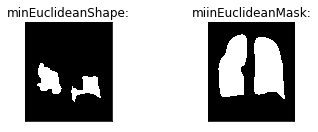

In [39]:
lungShapesDir = os.listdir("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\lungs_shape")
masksDir=os.listdir("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\mask")

minEuclideanDistance = 0;
minChiSquareDistance = 0;

euclideanDistList = []
chiSquareDistList = []

for i in range(len(lungShapesDir)):
    shape = cv2.imread('D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\lungs_shape\lungs_shape%d.png'%i, 0)
    mask = cv2.imread("D:\Document\MMU Sem 6\Visual Information Processing\Assignment\lung-dataset\large-lung-dataset\large-lung-dataset\mask\%s" % masksDir[i],0)
    
    print(i)
    
    # Euclidean Distance
    euclideanDist = euclideanDistance(shape,mask)
#     euclideanDistList.append(euclideanDist)
    if (minEuclideanDistance < euclideanDist):
        minEuclideanDistance = euclideanDist;
        
        minIndexEuclidean = i
        
        minEuclideanShape = shape
        minEuclideanMask = mask
        print("Euclidean:",minEuclideanDistance, "," , minIndexEuclidean)
    
    # Chi-Square Distance
#     normalisedChiSquareDist = chiSquareDist(shape,mask)
#     chiSquareDistList.append(normalisedChiSquareDist)
#     if (minChiSquareDistance > normalisedChiSquareDist):
#         minChiSquareDistance = normalisedChiSquareDist;
        
#         minIndexChiSquare = i
        
#         minChiSquareShape = shape
#         minChiSquareMask = mask
#         print("Chi-Square:",minChiSquareDistance, "," , minIndexChiSquare)
        
    
#     print("Max Euclidean Distance: ", maxEuclideanDistance)
#     print("Max Chi-Square Distance: ", minChiSquareDistance)


# print(np.mean(euclideanDistList))
# print(np.mean(chiSquareDistList))
plt.subplot(221),plt.imshow(minEuclideanShape,cmap='gray'),plt.title("minEuclideanShape:") #ceiling=ceil(len(img)/number of col)
plt.xticks([]), plt.yticks([])   
plt.subplot(222),plt.imshow(minEuclideanMask,cmap='gray'),plt.title("miinEuclideanMask:") #ceiling=ceil(len(img)/number of col)
plt.xticks([]), plt.yticks([])  
# plt.subplot(223),plt.imshow(minChiSquareShape,cmap='gray'),plt.title("minChiSquareShape:") #ceiling=ceil(len(img)/number of col)
# plt.xticks([]), plt.yticks([])   
# plt.subplot(224),plt.imshow(minChiSquareMask,cmap='gray'),plt.title("minChiSquareMask:") #ceiling=ceil(len(img)/number of col)
# plt.xticks([]), plt.yticks([])  
# print("Max Chi-Square Distance: ", maxChiSquareDistance)